# Fifa 20 Ultimate Team Player Machine Learning 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#statistical">Statistical Tests</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is about training a machine learning model to infer the football player position using his attributes such as pace, speed, finishing, acceleration amongst others. The dataset used was taken from Kaggle and, it is a list of players from the game Fifa Football 20.  

## Data Gathering

In [1]:
import zipfile
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
random.seed(42)

In [ ]:
# Extract contents from Premier League zip file 

with zipfile.ZipFile('fifa-20-ultimate-team-players-dataset.zip', 'r') as myzip:
    myzip.extractall()

In [2]:
# Read Players CSV

df = pd.read_csv('fut_bin20_players.csv')

/Users/Eduardo/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='wrangling'></a>
## Data Wrangling Process

#### Define

    - Remove column origin.
    - Remove column revision.
    - Remove columns (ps4, xbox, pc) _last, _min, _max, _prp.
    - Remove specialities.
    - Remove null GK skills.
    - Remove column traits.
    - Drop N/A.
    - Remove columns player_name, player_extended_name, club, league, nationality,    date_of_birth, quality, added_date, base_id, resource_id, futbin_id 
  

In [3]:
# Dataframe selection 

df_clean = df.copy()

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18775 entries, 0 to 18774
Data columns (total 95 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   futbin_id             18775 non-null  int64  
 1   player_name           18775 non-null  object 
 2   player_extended_name  18775 non-null  object 
 3   quality               18775 non-null  object 
 4   revision              18409 non-null  object 
 5   origin                1664 non-null   object 
 6   overall               18775 non-null  int64  
 7   club                  18775 non-null  object 
 8   league                18775 non-null  object 
 9   nationality           18775 non-null  object 
 10  position              18775 non-null  object 
 11  age                   18775 non-null  int64  
 12  date_of_birth         18775 non-null  object 
 13  height                18775 non-null  int64  
 14  weight                18775 non-null  int64  
 15  intl_rep           

In [5]:
df_clean.origin.unique()

array(['Prime', 'Medium', 'Base', nan, 'Season 1 Obj', 'TOTW1',
       'Transfers', 'Nation Change', 'OTW', 'TOTW2', 'TOTW3', 'TOTW4',
       'TOTW5', 'UltimateScream1', 'TOTW6', 'UltimateScream2', 'TOTW7',
       'TOTW8', 'RTTF1', 'Season 2 Obj', 'TOTW9', 'RTTF2', 'TOTW10',
       'TOTW11', 'TOTW12', 'TOTGS', 'TOTW13', 'TOTW14', 'TOTW15',
       'TOTW16', 'TOTY', 'TOTW17', 'TOTW18', 'Headliners1', 'TOTW19',
       'Headliners2', 'TOTW20', 'FutureStars'], dtype=object)

In [6]:
df_clean.revision.unique()

array(['Icon', 'Normal', 'PL POTM', 'Seasonal Objectives', 'Objectives',
       'IF', nan, 'Bundesliga POTM', 'MLS POTM', 'OTW', 'OTW SBC',
       'Flashback SBC', 'Premium SBC', 'Ligue 1 POTM', 'Bundes POTM',
       'Halloween SBC', 'Halloween', 'Halloween Obj.', 'CL', 'SBC',
       'Objective Special', 'SIF', 'Hero', 'UCL LIVE', 'UEL LIVE',
       'UCL LIVE SBC', 'UEL LIVE Obj.', 'UEL LIVE SBC',
       'Player Moments SBC', 'Player Moments Obj.', 'CL TOTT SBC',
       'CL TOTT', 'Europa TOTT', 'CL TOTT Obj.', 'Europa TOTT SBC',
       'FUTmas SBC', 'FUTmas Obj.', 'FUTmas', 'Holiday Season',
       'FUTmas Hld Season', 'FUTmas Obj', 'TIF', 'TOTY Flashback Obj',
       'TOTY', 'TOTY Flashback SBC', 'LaLiga POTM SBC', 'Players Moments',
       'Record Breaker', 'Headliners', 'Headliners Obj', 'Headliners SBC',
       'FUT Future Stars', 'FUT Future Stars SBC', 'FutureStars'],
      dtype=object)

In [7]:
df_clean.isnull().all().count()

95

In [8]:
df_clean.drop(['origin', 'revision'], axis=1, inplace=True)

df_clean.drop(['ps4_last', 'ps4_min', 'ps4_max', 'ps4_prp', 'xbox_last', 'xbox_min', 'xbox_max', 'xbox_prp', 'pc_last', 'pc_min', 'pc_max', 'pc_prp'], axis=1, inplace=True)

df_clean.drop(['specialities'], axis=1, inplace=True)

df_clean.dropna(subset=['shooting', 'passing', 'defending', 'physicality', 'dribbling', 'pace'], how='all', inplace=True)

df_clean.drop(['gk_diving', 'gk_reflexes', 'gk_handling', 'gk_speed', 'gk_kicking', 'gk_positoning'], axis=1, inplace=True)

df_clean.drop(['traits', 'intl_rep'], axis=1, inplace=True)

df_clean.drop(['player_name', 'player_extended_name', 'club', 'league', 'nationality','date_of_birth', 'quality', 'added_date', 'base_id','resource_id', 'futbin_id'], axis=1, inplace=True)

df_clean.head(1)

,overall,position,age,height,weight,pace,pace_acceleration,pace_sprint_speed,dribbling,drib_agility,...,cm,rm,lm,cam,cf,rf,lf,rw,lw,st
0,98,CAM,79,173,70,95.0,95.0,95.0,96.0,94.0,...,91.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,95.0


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16791 entries, 0 to 18774
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall            16791 non-null  int64  
 1   position           16791 non-null  object 
 2   age                16791 non-null  int64  
 3   height             16791 non-null  int64  
 4   weight             16791 non-null  int64  
 5   pace               16791 non-null  float64
 6   pace_acceleration  16791 non-null  float64
 7   pace_sprint_speed  16791 non-null  float64
 8   dribbling          16791 non-null  float64
 9   drib_agility       16791 non-null  float64
 10  drib_balance       16791 non-null  float64
 11  drib_reactions     16791 non-null  float64
 12  drib_ball_control  16791 non-null  float64
 13  drib_dribbling     16791 non-null  float64
 14  drib_composure     16791 non-null  float64
 15  shooting           16791 non-null  float64
 16  shoot_positioning  167

In [10]:
df_clean.drop(['pref_foot', 'att_workrate', 'def_workrate'], axis=1, inplace=True)

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16791 entries, 0 to 18774
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   overall            16791 non-null  int64  
 1   position           16791 non-null  object 
 2   age                16791 non-null  int64  
 3   height             16791 non-null  int64  
 4   weight             16791 non-null  int64  
 5   pace               16791 non-null  float64
 6   pace_acceleration  16791 non-null  float64
 7   pace_sprint_speed  16791 non-null  float64
 8   dribbling          16791 non-null  float64
 9   drib_agility       16791 non-null  float64
 10  drib_balance       16791 non-null  float64
 11  drib_reactions     16791 non-null  float64
 12  drib_ball_control  16791 non-null  float64
 13  drib_dribbling     16791 non-null  float64
 14  drib_composure     16791 non-null  float64
 15  shooting           16791 non-null  float64
 16  shoot_positioning  167

<a id='eda'></a>
## Exploratory Data Analysis

> The Exploratory Data Analysis presented in this notebook is only to give a glimpse of the dataset's content. If you want a more complex EDA, you can find at the notebook fifa-fut-2020-analysis in the project's repository. 

In [12]:
df_eda = df_clean.copy()

### Positions


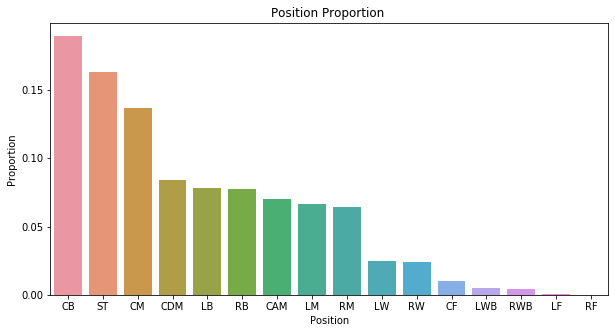

In [11]:
# Proportion Per Position 

n = df_eda.shape[0]
max_count = df_eda['position'].value_counts().max()
max_prop = max_count / n

# Tick mark locations
tick_props = np.arange(0, 1, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

def graph_position():
    sb.countplot(data = df_eda, x = 'position', order = df_eda['position'].value_counts().index); 
    plt.xlabel('Position')
    plt.ylabel('Proportion')
    plt.title('Position Proportion ')

plt.figure(figsize=[10,5])
plt.yticks(tick_props * n, tick_names)

graph_position()

### Heat Map

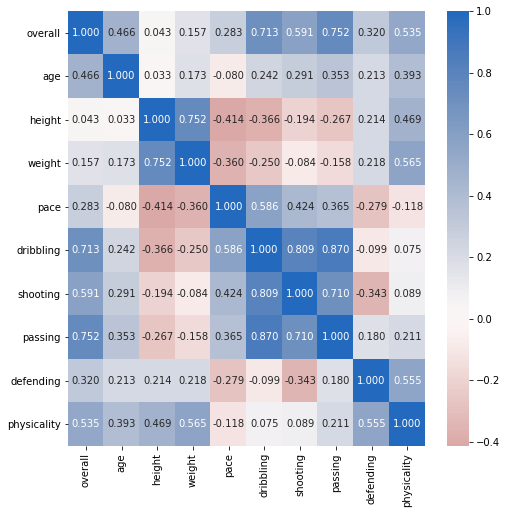

In [12]:
numeric_vars = ['overall', 'age', 'height', 'weight', 'pace', 'dribbling', 'shooting', 'passing', 'defending', 'physicality'] 
                
categoric_vars = ['position','quality']

plt.figure(figsize=[8,8])   

def heat_graph():
    sb.heatmap(df_eda[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center=0)
    
heat_graph() 


The passing and the dribbling attributes are the main factors to predic the overall of a player. No other attribute has such impact on the overall.


# Machine Learning

In [13]:
sample = df_eda.copy()

### Feature Selection

Feature selection is an important step when trying to predict a player's position. We selected the main features presented in the dataset and, now we need to verify which ones are the better when predicting the player's position. The method chosen was Sklearn Feature Selection using the function Select K Best. K is the number of features to select and, we need to compare the number of features to the mean absolute error. The mean absolute error is a risk metric corresponding to the expected value of the absolute error loss. By comparing these two variables, we get the best K variables, the ones with the lowest mean absolute error, when predicting the player's position.

Another step is encoding the categorical variables. Since we are trying to predict a categorical variable, and machine learning models only accept numbers as inputs and outputs, we need to encode the categorical variable.

#### Preprocessing - split the dataset into two datasets, train and, test.

In [14]:
#variables = ['shooting', 'passing', 'defending', 'physicality', 'dribbling', 'pace', 'weight', 'height', 'age']

#X = sample[variables]
X = sample.drop(['position'], axis=1)
y = sample['position']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier


def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
        
    return X_train_enc, X_test_enc
    
    
# Prepare the out    
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    
    return y_train_enc, y_test_enc


# Features selection
def select_features_chi2(X_train, y_train, X_test):
    selector = SelectKBest(score_func=chi2, k='all')
    
    selector.fit(X_train, y_train)
    
    # Reduce X to the selected variables
    X_train2 = selector.transform(X_train)
    X_test2 = selector.transform(X_test)
    
    return X_train2, X_test2, selector

def select_features_classif(X_train, y_train, X_test):
    selector = SelectKBest(score_func=f_classif, k='all')
    
    selector.fit(X_train, y_train)
    
    # Reduce X to the selected variables
    X_train2 = selector.transform(X_train)
    X_test2 = selector.transform(X_test)
    
    return X_train2, X_test2, selector


def select_features_rf(X_train, y_train, X_test):
    selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))

    selector.fit(X_train, y_train)
    
    # Reduce X to the selected variables
    X_train2 = selector.transform(X_train)
    X_test2 = selector.transform(X_test)
    
    return X_train2, X_test2, selector

def select_features_classif_rf(X_train, y_train, X_test, y_test):

    sample_size = len(sample.columns)
    
    best_features = []
    
    # Use groups of two variables 
    for k in range(2, sample_size, 2):
        selector = SelectKBest(score_func=f_classif, k='all')
        
        # Reduce X to the selected variables
        selector.fit(X_train, y_train)
        
        X_train2 = selector.transform(X_train)
        X_test2 = selector.transform(X_test)

        # Fit a Random Forest Classifier with the features selected by K best
        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        model.fit(X_train2, y_train)

        p = model.predict(X_test2)
        
        score = cohen_kappa_score(y_test, p)
        
        best_features.append(score)
        
    return best_features

#### Feature selection with KBest method using Pearson's Chi-Squared Test

Test each feature separately using Pearson's chi-squared test. The higher the result of the test, the most relevant the feature is. 

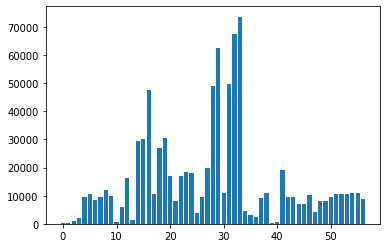

In [19]:
#X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train2, X_test2, selector = select_features_chi2(X_train, y_train_enc, X_test)

plt.bar([i for i in range(len(selector.scores_))], selector.scores_);

From the graph above we can verify that features 14, 15, 16, 28, 29, 31, 32 and, 33 are the most relevant ones. 

#### Feature selection with KBest method using Mutual Information 

Mutual information evaluates the gain of each variable in the context of the target variable. Information gain measures the reduction of "surprises" by splitting a dataset according to a given value of a random variable. To sum up, larger the information gain means less surprise.

https://machinelearningmastery.com/information-gain-and-mutual-information/

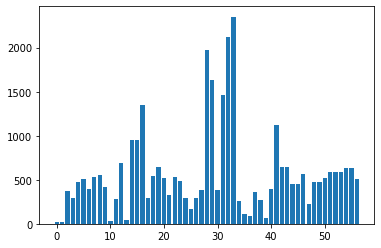

In [22]:
X_train2, X_test2, selector = select_features_classif(X_train, y_train_enc, X_test)

plt.bar([i for i in range(len(selector.scores_))], selector.scores_);

The result is similar to the one we found using Chi-Squared. Features 14, 15, 16, 28, 29, 31, 32, 33 and, 41 are the most relevant ones. 

#### Feature selection using Random Forest Classifier

Using a Random Forest Classifier algorithm to perform the features selection, we are able to combine filter and wrapper methods. 

In [37]:
X_train2, X_test2, selector = select_features_rf(X_train, y_train_enc, X_test)

#selector.get_support()

plt.bar([i for i in range(len(selector.estimator_))], selector.scores_);

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False])

#### Feature selection using KBest method with Mutual Information and, predicting output with a Random Forest Classifier

In [41]:
best_features = select_features_classif_rf(X_train, y_train_enc, X_test, y_test_enc)

In [42]:
best_features

[0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496,
 0.6361427278018496]

After printing out the k select and the mean absolute error, we can verify that adding variables to the model reduces the error. Now we need to find the best features to be used. We will consider 58 features because it is a stable range between 50 and 65. 

## 08/07 - 
Criar gráfico da feature selection utilizando Random Forest. Entender pq as métricas não estão funcionando quando utilizo a Random Forest após selecionar as features via f_classif.

## Cross-Validation 

Allows us to compare different machine learning methods and get a sense of how well they will work in practice. 

In [23]:
from sklearn.model_selection import KFold

#### The first thing we need to do is split our sample

In [27]:
# Create train and valid variables

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

#### Encode the categorical variables

In [28]:
# Encode Variables

X_train_enc, X_valid_enc = prepare_inputs(X_train, X_valid)
y_train_enc, y_valid_enc = prepare_targets(y_train, y_valid)

#### Fit a Random Forest Classifier 

In [30]:
from sklearn.model_selection import KFold

results = []

for rep in range(10):

    kf = KFold(10, shuffle=True, random_state = 0)

    for train_lines, valid_lines in kf.split(X):
        X_train_enc, X_valid_enc = X.iloc[train_lines], X.iloc[valid_lines]
        y_train_enc, y_valid_enc = y.iloc[train_lines], y.iloc[valid_lines]

        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        model.fit(X_train_enc, y_train_enc)

        p = model.predict(X_valid_enc)

        acc = np.mean(y_valid_enc == p)
        results.append(acc)


In [26]:
print('Mean:', np.mean(results))
print('Standard Deviation:', np.std(results))
print('Variance:', np.var(results))

Mean: 0.6267644431209053
Standard Deviation: 0.010868139883050054
Variance: 0.00011811646451754324


#### Support Vector Machines

In [41]:
from sklearn.svm import SVC

In [44]:
X = sample[variables]
y = sample['position']

results = []

variables = ['shooting']

for rep in range(10):

    kf = KFold(10, shuffle=True, random_state = 0)

    for train_lines, valid_lines in kf.split(X):
        X_train, X_valid = X.iloc[train_lines], X.iloc[valid_lines]
        y_train, y_valid = y.iloc[train_lines], y.iloc[valid_lines]
        
        X_train_enc, X_valid_enc = prepare_inputs(X_train, X_valid)
        y_train_enc, y_valid_enc = prepare_targets(y_train, y_valid)

        clf = SVC(kernel='linear')
        clf.fit(X_train_enc, y_train_enc)

        p3 = clf.predict(X_valid_enc)

        acc = np.mean(y_valid_enc == p3)
        results.append(acc)

# Results measures         
        
print('Mean:', np.mean(results))
print('Standard Deviation:', np.std(results))
print('Variance:', np.var(results))

KeyboardInterrupt: 